# Análisis de Siniestros Viales en Buenos Aires carga de datos

# Introducción

# Este proyecto analiza la frecuencia de accidentes de tráfico en la ciudad de Buenos Aires, evaluando la variación según la hora del día, el rango horario y el tipo de calle. El objetivo es determinar en qué horas del día son más frecuentes los accidentes y qué tipo de vehículos están involucrados (autos, bicicletas, motos y camiones).

1. Cargar y Exploración Inicial de los Datos

In [2]:
import pandas as pd #importamos las librerias con las que vamos a trabajar en el proyecto
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


#configuramos en este código, los estilos gráficos
sns.set(style="whitegrid") #librería de visualización de datos basada en matplotlib
plt.style.use("fivethirtyeight")


# Aca descargamos por archivos en formato excel, en donde tenemos datos sobre los homicidios con datos especificos.

In [3]:
# Cargar los datasets
homicidios = pd.read_excel('homicidios.xlsx')
victimas = pd.read_excel('victimas.xlsx')


In [4]:
# Visualizamos el primer archivo homicidios.xlsx

In [5]:
# Creamos un DataFrame del archivo homicidios y lo imprimimos
df_homicidios = homicidios

homicidios

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [6]:
# Podemos ver  que el archivo homicidios tienen valores nulos, en este caso los identificamos como 'SD' o 'NAN'

# Visualizamos el archivo victimas.xlsx


In [7]:
df_victimas = pd.read_excel('victimas.xlsx')

df_victimas #Mostramos los datos como figuran en archivo en axel

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


2. Limpieza y Preprocesamiento de los Datos

In [8]:
print(homicidios.info()) #Información general

print(homicidios.describe()) #Resumen estadístico

#Tipos de los datos correspondan con las variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [9]:
#tipo de variable (Cualitativa, cuantitativa)
print(df_victimas.info()) #Información general

print(df_victimas.describe()) #Resumen estadístico

#Tipos de los datos correspondan con las variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB
None
                               FECHA         AAAA          MM          DD
count                            717   717.000000  717.000000 

In [10]:
#Pasamos a conservar los datos que queremos consercar y los convertimos en DataFrame

In [11]:
# En este código, selecionamos las filas del archivo "HOMICIDIOS", el cual necesitamos usar para realizar los analisis pertinentes

columnas_conservar_homicidios = ['ID', 'N_VICTIMAS', 'FECHA', 'HH', 'HORA', 'LUGAR_DEL_HECHO', 
                                 'TIPO_DE_CALLE', 'Dirección Normalizada', 
                                 'COMUNA','XY (CABA)','pos x','pos y','PARTICIPANTES', 'VICTIMA', 'ACUSADO']

homicidios_filtrados= homicidios[columnas_conservar_homicidios]

df = homicidios_filtrados

df = homicidios_filtrados


In [12]:
# En este código, selecionamos las filas del archivo "VICTIMAS", el cual necesitamos usar para realizar los analisis pertinentes
columnas_conservar_victimas = ['ID_hecho', 'FECHA', 'ROL', 'VICTIMA', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO']

df_victimas = victimas[columnas_conservar_victimas]

df = df_victimas

df_victimas

,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


# Creamos las variables homicidios_filtrados y  df_victimas a DataFrame

In [13]:
# Asegúrate de que ambas variables sean DataFrames
if isinstance(homicidios_filtrados, pd.Series):
    homicidios_filtrados = homicidios_filtrados.to_frame()

if isinstance(df_victimas, pd.Series):
    df_victimas = df_victimas.to_frame()


In [14]:
df = homicidios_filtrados

In [15]:
homicidios_filtrados

,ID,N_VICTIMAS,FECHA,HH,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,4,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,1,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,7,07:00:00,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,0,00:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,5,05:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,17,17:10:00,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,1,01:10:00,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,0,00:43:00,AV. GAONA Y TERRADA,AVENIDA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,10,10:30:00,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


# Unimos los dos archivos con los datos previamente seleccionados

In [16]:
df_hechos_victimas = homicidios_filtrados.merge(df_victimas, left_on='ID', right_on='ID_hecho', how='outer')

In [17]:
df_hechos_victimas['coords_googlemaps'] = df_hechos_victimas.apply(
    lambda row: f"{row['pos y']},{row['pos x']}", axis=1
)

# Display the dataframe to verify the new column
print(df_hechos_victimas[['pos y', 'pos x', 'coords_googlemaps']].head())

          pos y         pos x          coords_googlemaps
0  -34.68757022  -58.47533969  -34.68757022,-58.47533969
1  -34.66977709  -58.50877521  -34.66977709,-58.50877521
2  -34.63189362  -58.39040293  -34.63189362,-58.39040293
3  -34.68092974  -58.46503904  -34.68092974,-58.46503904
4  -34.62246630  -58.38718297  -34.62246630,-58.38718297


# Visualizamos como queda el DataFrame unificado

In [18]:
df_hechos_victimas 

,ID,N_VICTIMAS,FECHA_x,HH,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),...,VICTIMA_x,ACUSADO,ID_hecho,FECHA_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO,coords_googlemaps
0,2016-0001,1,2016-01-01,4,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),...,MOTO,AUTO,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,"-34.68757022,-58.47533969"
1,2016-0002,1,2016-01-02,1,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),...,AUTO,PASAJEROS,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00,"-34.66977709,-58.50877521"
2,2016-0003,1,2016-01-03,7,07:00:00,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),...,MOTO,AUTO,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00,"-34.63189362,-58.39040293"
3,2016-0004,1,2016-01-10,0,00:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),...,MOTO,SD,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18,SD,"-34.68092974,-58.46503904"
4,2016-0005,1,2016-01-21,5,05:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),...,MOTO,PASAJEROS,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00,"-34.62246630,-58.38718297"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,17,17:10:00,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),...,MOTO,AUTO,2021-0093,2021-12-13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00,"-34.64561636,-58.43353773"
713,2021-0094,1,2021-12-20,1,01:10:00,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),...,MOTO,AUTO,2021-0094,2021-12-20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00,"-34.65117757,-58.46739825"
714,2021-0095,1,2021-12-30,0,00:43:00,AV. GAONA Y TERRADA,AVENIDA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),...,MOTO,CARGAS,2021-0095,2021-12-30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00,"-34.61984745,-58.47293407"
715,2021-0096,1,2021-12-15,10,10:30:00,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),...,AUTO,CARGAS,2021-0096,2021-12-15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00,"-34.65021673,-58.47066794"


In [19]:
#Visualizamos los valores nulos de Homicidios

In [20]:
#df_hechos_victimas = df.isnull().sum()
#print(df_hechos_victimas)


In [21]:
df_hechos_victimas 

,ID,N_VICTIMAS,FECHA_x,HH,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),...,VICTIMA_x,ACUSADO,ID_hecho,FECHA_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO,coords_googlemaps
0,2016-0001,1,2016-01-01,4,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),...,MOTO,AUTO,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,"-34.68757022,-58.47533969"
1,2016-0002,1,2016-01-02,1,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),...,AUTO,PASAJEROS,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00,"-34.66977709,-58.50877521"
2,2016-0003,1,2016-01-03,7,07:00:00,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),...,MOTO,AUTO,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00,"-34.63189362,-58.39040293"
3,2016-0004,1,2016-01-10,0,00:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),...,MOTO,SD,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18,SD,"-34.68092974,-58.46503904"
4,2016-0005,1,2016-01-21,5,05:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),...,MOTO,PASAJEROS,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00,"-34.62246630,-58.38718297"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,17,17:10:00,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),...,MOTO,AUTO,2021-0093,2021-12-13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00,"-34.64561636,-58.43353773"
713,2021-0094,1,2021-12-20,1,01:10:00,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),...,MOTO,AUTO,2021-0094,2021-12-20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00,"-34.65117757,-58.46739825"
714,2021-0095,1,2021-12-30,0,00:43:00,AV. GAONA Y TERRADA,AVENIDA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),...,MOTO,CARGAS,2021-0095,2021-12-30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00,"-34.61984745,-58.47293407"
715,2021-0096,1,2021-12-15,10,10:30:00,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),...,AUTO,CARGAS,2021-0096,2021-12-15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00,"-34.65021673,-58.47066794"


In [22]:
df_hechos_victimas.to_csv('presentacion_segundo_proyecto.csv', index=False)

In [23]:
df_hechos_victimas = pd.read_csv('presentacion_segundo_proyecto.csv')

In [24]:
df_hechos_victimas

,ID,N_VICTIMAS,FECHA_x,HH,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),...,VICTIMA_x,ACUSADO,ID_hecho,FECHA_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO,coords_googlemaps
0,2016-0001,1,2016-01-01,4,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),...,MOTO,AUTO,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,"-34.68757022,-58.47533969"
1,2016-0002,1,2016-01-02,1,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),...,AUTO,PASAJEROS,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00,"-34.66977709,-58.50877521"
2,2016-0003,1,2016-01-03,7,07:00:00,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),...,MOTO,AUTO,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00,"-34.63189362,-58.39040293"
3,2016-0004,1,2016-01-10,0,00:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),...,MOTO,SD,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18,SD,"-34.68092974,-58.46503904"
4,2016-0005,1,2016-01-21,5,05:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),...,MOTO,PASAJEROS,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00,"-34.62246630,-58.38718297"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,17,17:10:00,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),...,MOTO,AUTO,2021-0093,2021-12-13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00,"-34.64561636,-58.43353773"
713,2021-0094,1,2021-12-20,1,01:10:00,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),...,MOTO,AUTO,2021-0094,2021-12-20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00,"-34.65117757,-58.46739825"
714,2021-0095,1,2021-12-30,0,00:43:00,AV. GAONA Y TERRADA,AVENIDA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),...,MOTO,CARGAS,2021-0095,2021-12-30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00,"-34.61984745,-58.47293407"
715,2021-0096,1,2021-12-15,10,10:30:00,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),...,AUTO,CARGAS,2021-0096,2021-12-15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00,"-34.65021673,-58.47066794"


Variables categóricas

683


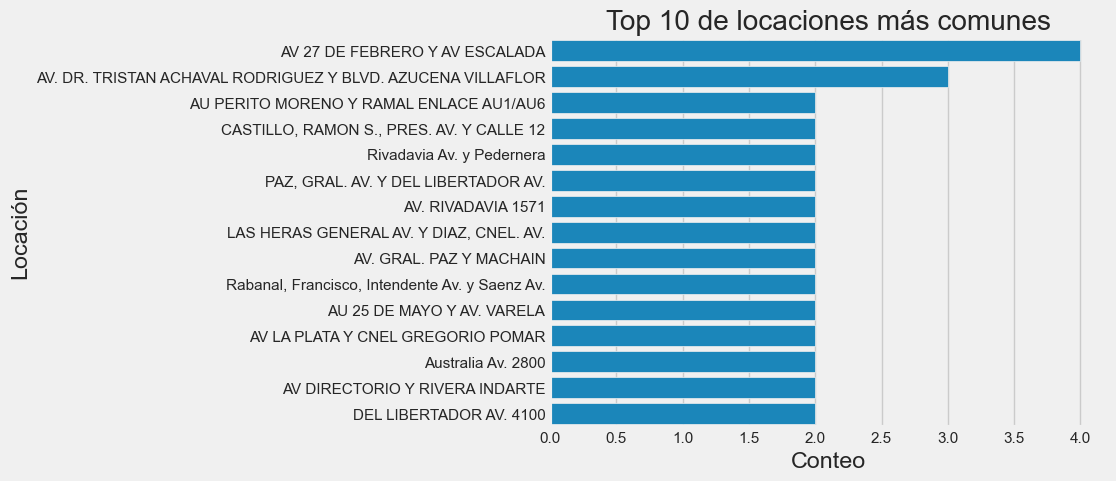

In [39]:
print(len(df_hechos_victimas['LUGAR_DEL_HECHO'].unique()))

LUGAR_DEL_HECHO_top_10 = df_hechos_victimas['LUGAR_DEL_HECHO'].value_counts().head(15)

# Create a bar plot
ax = sns.barplot(x=LUGAR_DEL_HECHO_top_10.values, y=LUGAR_DEL_HECHO_top_10.index, orient='h')

# Set labels and title
ax.set_xlabel('Conteo')
ax.set_ylabel('Locación')
ax.set_title('Top 10 de locaciones más comunes')

# Show plot
plt.show()

16
COMUNA
1     93
4     79
9     75
8     67
7     62
3     46
15    45
13    40
12    39
14    37
11    33
10    30
2     25
6     22
5     22
0      2
Name: count, dtype: int64


<Axes: xlabel='COMUNA', ylabel='count'>

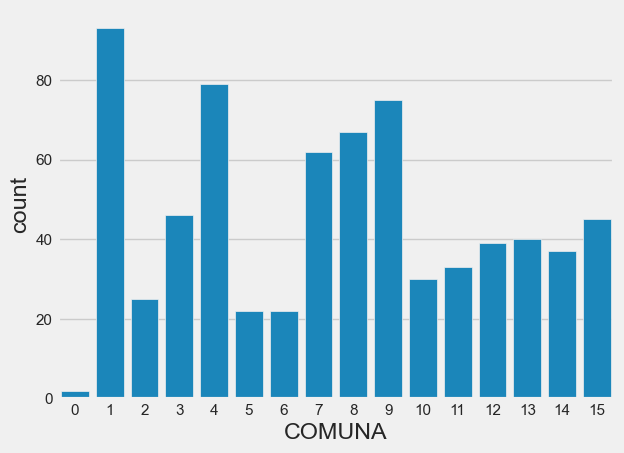

In [37]:

print(len(df_hechos_victimas['COMUNA'].unique()))

print(df_hechos_victimas['COMUNA'].value_counts())
sns.countplot(data=df_hechos_victimas, x='COMUNA')



<Axes: xlabel='N_VICTIMAS'>

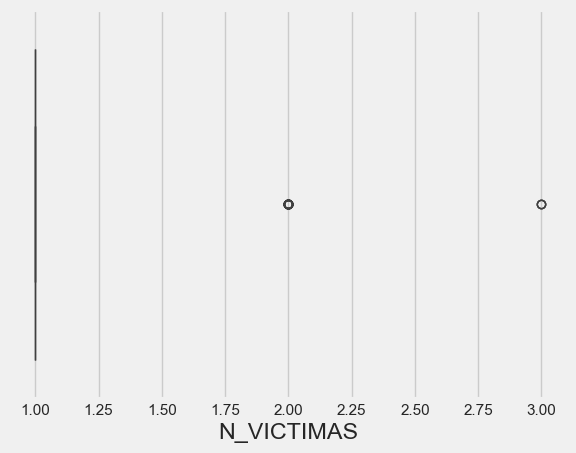

In [32]:
sns.boxplot(data=df_hechos_victimas,x='N_VICTIMAS')

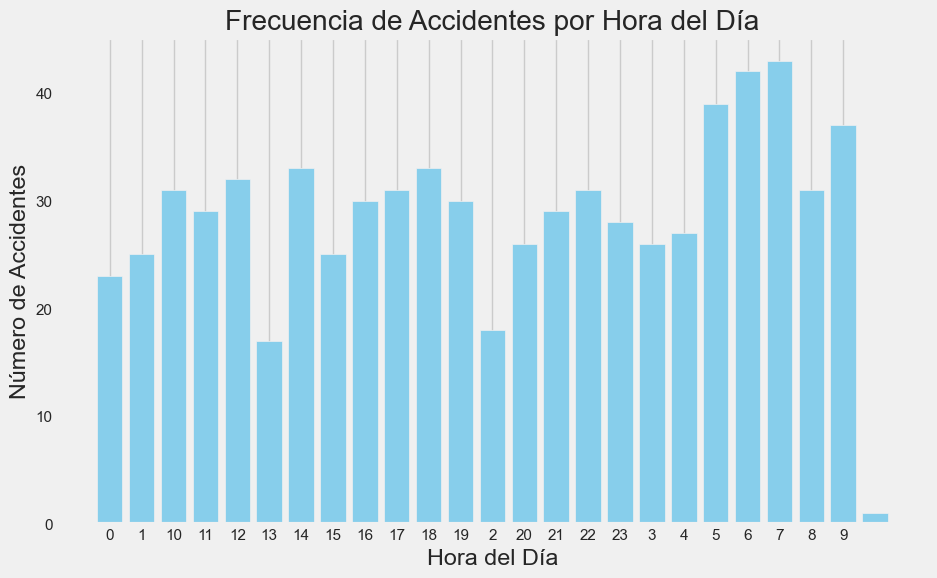

In [31]:

df_hechos_victimas['HORA'] = pd.to_datetime(df_hechos_victimas['HORA'], errors='coerce').dt.hour

df_hechos_victimas['HORA'] = pd.to_datetime(df_hechos_victimas['HORA'], errors='coerce').dt.hour

plt.show()

frecuencia_accidentes = df_hechos_victimas.groupby('HH').size()

plt.figure(figsize=(10, 6))
plt.bar(frecuencia_accidentes.index, frecuencia_accidentes.values, color='skyblue')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Accidentes')
plt.title('Frecuencia de Accidentes por rango de horario')
plt.xticks(range(24)) 
plt.grid(axis='y')

plt.show()
